In [58]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [59]:
import numpy as np

In [60]:
import nsfg
import first
import thinkstats2
import thinkplot

In [61]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [62]:
live, firsts, others = first.MakeFrames()

In [63]:
## START OF ASSIGNMENT 3.1

In [64]:
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.Items())

In [65]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [66]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [67]:
resp = nsfg.ReadFemResp()

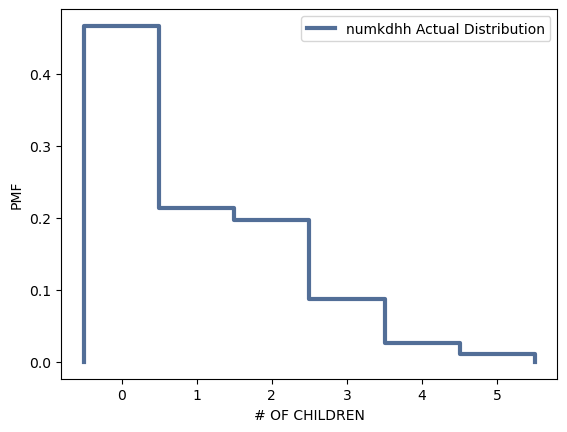

In [68]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh Actual Distribution')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel= "# OF CHILDREN", ylabel= "PMF")

In [69]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

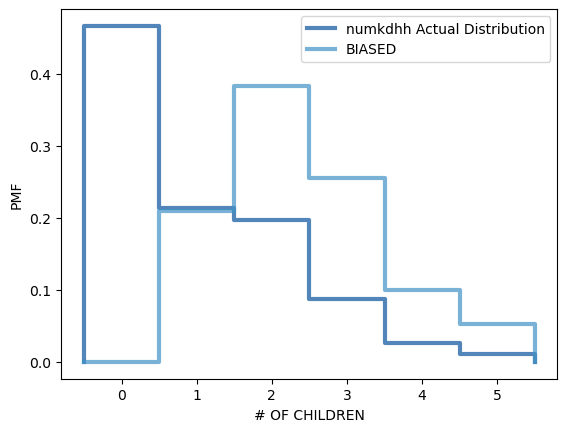

In [70]:
biased_pmf = BiasPmf(pmf, label="BIASED")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="# OF CHILDREN", ylabel="PMF")

In [71]:
## START OF ASSIGNMENT 3.2

In [72]:
pmf.Mean()

1.024205155043831

In [73]:
biased_pmf.Mean()

2.403679100664282

In [74]:
PmfMean = pmf.Mean()
PmfVar = pmf.Var()

In [75]:
print(PmfMean)

1.024205155043831


In [76]:
print(PmfVar)

1.4128643263531195


In [77]:
## START OF ASSIGNMENT 4.1

In [78]:
live, firsts, others = first.MakeFrames()

In [79]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [80]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [81]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()

In [82]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

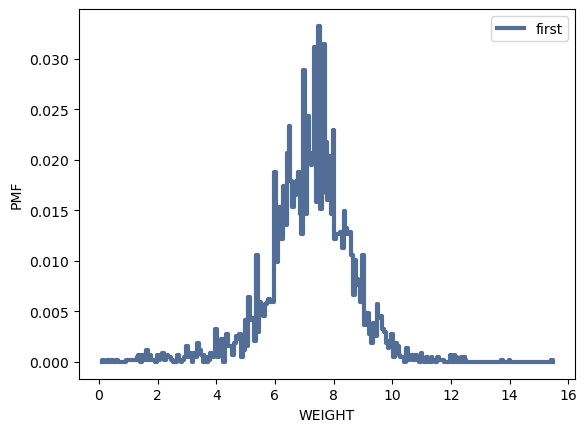

In [83]:
thinkplot.Pmf(first_pmf)
thinkplot.Config(xlabel= "WEIGHT", ylabel= "PMF")

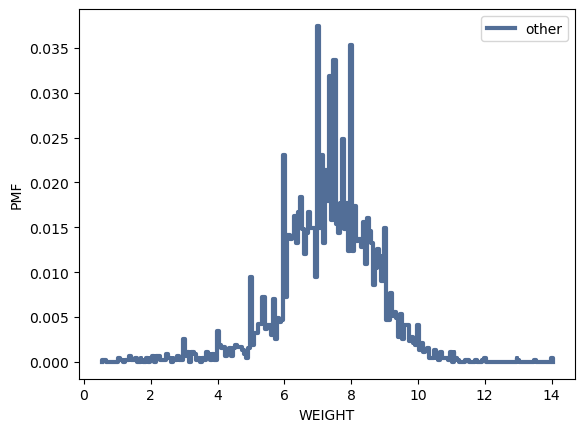

In [84]:
thinkplot.Pmf(other_pmf)
thinkplot.Config(xlabel= "WEIGHT", ylabel= "PMF")

In [85]:
other_cdf.PercentileRank(6.1)

14.588235294117647

In [86]:
## START OF ASSIGNMENT 4.2

In [87]:
random = np.random.random(size=1000)

In [88]:
random_pmf = thinkstats2.Pmf(random, label='RANDOM SAMPLE')

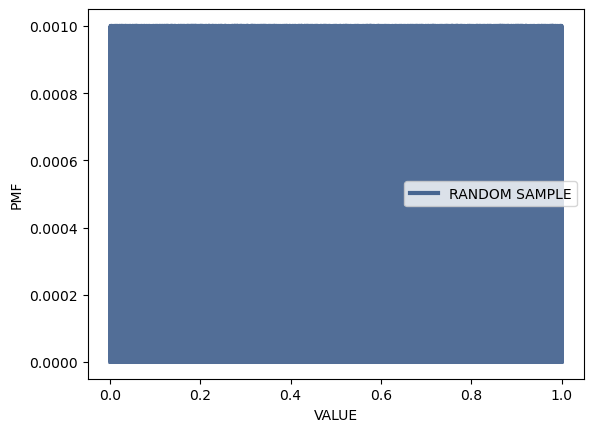

In [89]:
thinkplot.Pmf(random_pmf)
thinkplot.Config(xlabel= "VALUE", ylabel= "PMF")

In [90]:
random_cdf = thinkstats2.Cdf(random, label='RANDOM SAMPLE')

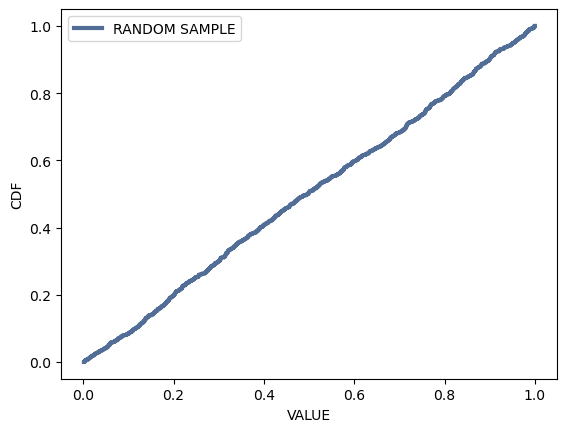

In [91]:
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel= "VALUE", ylabel= "CDF")